In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines
import matplotlib as mpl
import sklearn.manifold
import sklearn.decomposition
import sklearn.cluster
import sklearn.svm
import h5py
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
import pandas as pd

## Training Properties

In [76]:
aug_data_path = '/media/andjela/SeagatePor1/LSSL/data/CP_longitudinal_img_aug.h5' 
data_aug = h5py.File(aug_data_path, 'r')
print(np.array(data_aug), np.array(data_aug).shape)
sub_1 = np.array(data_aug['sub-001'])
print('sub-001', sub_1.shape)
print(sub_1)
print(np.array(data_aug['sub-001']['sub-001_ses-002_rigid_T1w_64.nii.gz']).shape)


['sub-001' 'sub-002' 'sub-003' 'sub-004' 'sub-005' 'sub-006' 'sub-007'
 'sub-008' 'sub-009' 'sub-010' 'sub-011' 'sub-012' 'sub-013' 'sub-014'
 'sub-015' 'sub-016' 'sub-017' 'sub-018' 'sub-019' 'sub-020' 'sub-021'
 'sub-022' 'sub-023' 'sub-024' 'sub-025' 'sub-026' 'sub-027' 'sub-028'
 'sub-029' 'sub-030' 'sub-031' 'sub-032' 'sub-033' 'sub-034' 'sub-035'
 'sub-036' 'sub-037' 'sub-038' 'sub-039' 'sub-040' 'sub-041' 'sub-042'
 'sub-043' 'sub-044' 'sub-045' 'sub-046' 'sub-047' 'sub-048' 'sub-049'
 'sub-050' 'sub-051' 'sub-052' 'sub-053' 'sub-054' 'sub-055' 'sub-056'
 'sub-057' 'sub-058' 'sub-059' 'sub-060' 'sub-061' 'sub-062' 'sub-063'
 'sub-064'] (64,)
sub-001 (5,)
['sub-001_ses-001_rigid_T1w_64.nii.gz'
 'sub-001_ses-002_rigid_T1w_64.nii.gz'
 'sub-001_ses-003_rigid_T1w_64.nii.gz'
 'sub-001_ses-004_rigid_T1w_64.nii.gz'
 'sub-001_ses-005_rigid_T1w_64.nii.gz']
(10, 64, 64, 64)


In [87]:
folds = 5
splits = ['train', 'test', 'val']

for i in range(folds):
    print(f'fold{i}')
    for split in splits:
        data_path = f'/media/andjela/SeagatePor1/LSSL/data/fold{i}_{split}_C.txt'
        df = pd.read_fwf(data_path)
        print(f'{split}', df.shape) #df.keys()
    print('----------------')


fold0
train (324, 5)
test (85, 5)
val (22, 5)
----------------
fold1
train (343, 5)
test (64, 5)
val (24, 5)
----------------
fold2
train (357, 5)
test (47, 5)
val (27, 5)
----------------
fold3
train (318, 5)
test (93, 5)
val (20, 5)
----------------
fold4
train (324, 5)
test (69, 5)
val (38, 5)
----------------


## Health Aging

In [39]:
ckpt_path = '/media/andjela/SeagatePor1/LSSL/data/CP/LSP'
time_label = '2023_6_5_11_51'  # ls=1024, bs=64   
data_train = h5py.File(ckpt_path+time_label+'/result_train/results_allbatch.h5', 'r')
data = h5py.File(ckpt_path+time_label+'/result_test/results_alldataset.h5', 'r')

In [46]:
print(type(data))
print(np.array(data))
print(np.array(data_train))

<class 'h5py._hl.files.File'>
['age' 'img1' 'img2' 'interval' 'label' 'recon1' 'recon2' 'z1' 'z2']
['age' 'img1' 'img2' 'interval' 'label' 'recon1' 'recon2' 'z1' 'z2']


In [44]:
img_1 = np.array(data['img1'])
img_2 = np.array(data['img2'])
print('img1', img_1.shape, 'img2', img_2.shape)
age = np.array(data['age'])
print('age', age.shape)
interval = np.array(data['interval'])
print('interval', interval.shape)
label = np.array(data['label'])
print('label', label.shape)
recon_1 = np.array(data['recon1'])
recon_2 = np.array(data['recon2'])
print('recon1', recon_1.shape, 'recon2', recon_2.shape)
z_1 = np.array(data['z1'])
z_2 = np.array(data['z2'])
print('z1', z_1.shape, 'z2', z_2.shape)

img1 (86, 1, 64, 64, 64) img2 (86, 1, 64, 64, 64)
age (86,)
interval (86,)
label (0,)
recon1 (86, 1, 64, 64, 64) recon2 (86, 1, 64, 64, 64)
z1 (86, 1024) z2 (86, 1024)


In [47]:
# label_raw = np.array(data['label']).astype(int)
# label_raw = (label_raw > 0).astype(int)
z1_raw = np.array(data['z1'])
z2_raw = np.array(data['z2'])
interval_raw = np.array(data['interval'])
age_raw = np.array(data['age'])
delta_z_raw = (z2_raw - z1_raw) / np.expand_dims(interval_raw, 1) #speed of brain aging; z2-z1/delta(t)

# label_raw_train = np.array(data_train['label']).astype(int)
# label_raw_train = (label_raw_train > 0).astype(int)
z1_raw_train = np.array(data_train['z1'])
z2_raw_train = np.array(data_train['z2'])
interval_raw_train = np.array(data_train['interval'])
age_raw_train = np.array(data_train['age'])
delta_z_raw_train = (z2_raw_train - z1_raw_train) / np.expand_dims(interval_raw_train, 1)

print('Speed of brain aging \n', 'test', delta_z_raw.shape, 'train', delta_z_raw_train.shape)

speed of aging 
 test (86, 1024) train (325, 1024)


In [49]:
print(age_raw)
# print(age_raw_train)

[3.6139 3.6139 3.6139 4.0694 4.0694 4.6167 3.7306 3.7306 3.7306 3.7306
 4.2028 4.2028 4.2028 5.2944 5.2944 5.8139 3.3    3.3    3.3    3.3
 3.7722 3.7722 3.7722 4.2583 4.2583 4.7722 3.4333 3.4333 3.4333 3.4333
 3.4333 3.9528 3.9528 3.9528 3.9528 4.4917 4.4917 4.4917 4.9722 4.9722
 5.4472 3.6361 3.5444 3.5444 3.5444 3.5444 4.4861 4.4861 4.4861 5.0389
 5.0389 5.5167 3.3333 3.3333 3.9778 3.5361 3.2889 3.2889 3.7889 3.4778
 3.4778 3.4778 3.4778 3.4778 3.8444 3.8444 3.8444 3.8444 4.35   4.35
 4.35   4.8472 4.8472 5.3444 3.6028 3.6028 3.6028 4.125  4.125  4.6556
 4.2278 4.2278 4.2278 4.725  4.725  5.2194]


In [50]:
interval_raw

array([0.4555, 1.0028, 1.8972, 0.5473, 1.4417, 0.8944, 0.4722, 1.5638,
       2.0833, 3.0805, 1.0916, 1.6111, 2.6083, 0.5195, 1.5167, 0.9972,
       0.4722, 0.9583, 1.4722, 1.9528, 0.4861, 1.    , 1.4806, 0.5139,
       0.9945, 0.4806, 0.5195, 1.0584, 1.5389, 2.0139, 3.0278, 0.5389,
       1.0194, 1.4944, 2.5083, 0.4805, 0.9555, 1.9694, 0.475 , 1.4889,
       1.0139, 0.9917, 0.9417, 1.4945, 1.9723, 2.7223, 0.5528, 1.0306,
       1.7806, 0.4778, 1.2278, 0.75  , 0.6445, 1.6528, 1.0083, 0.9972,
       0.5   , 1.0194, 0.5194, 0.3666, 0.8722, 1.3694, 1.8666, 2.875 ,
       0.5056, 1.0028, 1.5   , 2.5084, 0.4972, 0.9944, 2.0028, 0.4972,
       1.5056, 1.0084, 0.5222, 1.0528, 1.6278, 0.5306, 1.1056, 0.575 ,
       0.4972, 0.9916, 2.6222, 0.4944, 2.125 , 1.6306], dtype=float32)

In [51]:
print( 'z1_train', z1_raw_train.shape)
print( 'z2_train', z2_raw_train.shape)

z1_train (325, 1024)
z2_train (325, 1024)


In [52]:
# PCA on train set and apply on test set
idx_sel = np.sort(np.where(interval_raw_train>1)[0]) #need to do this pre-selection? technically can take even small variations in time
num_sel = idx_sel.shape[0]
# print('idx_sel', idx_sel)
print('num_sel', num_sel)

feats = np.concatenate([z1_raw_train[idx_sel], z2_raw_train[idx_sel]], 0)
print('feats', feats.shape)
pca = sklearn.decomposition.PCA(n_components=2)
zs = pca.fit_transform(feats)
print('zs', zs.shape)
z1 = zs[:num_sel]
z2 = zs[num_sel:2*num_sel]
# label = label_raw_train[idx_sel]
age = age_raw_train[idx_sel]
delta_z = (z2 - z1) / np.expand_dims(interval_raw_train[idx_sel], 1)

num_sel_test = z1_raw.shape[0]
feats_test = np.concatenate([z1_raw, z2_raw], 0)
zs_test = pca.transform(feats_test)
z1_test = zs_test[:num_sel_test]
z2_test = zs_test[num_sel_test:2*num_sel_test]
# label_test = label_raw
age_test = age_raw
delta_z_test = (z2_test - z1_test) / np.expand_dims(interval_raw, 1)

num_sel 147
feats (294, 1024)
zs (294, 2)


In [55]:
# PCA on train set and apply on test set
num_sel_train = z1_raw_train.shape[0] #325

feats = np.concatenate([z1_raw_train, z2_raw_train], 0)
print('feats', feats.shape)
pca = sklearn.decomposition.PCA(n_components=2)
zs = pca.fit_transform(feats)
print('zs', zs.shape)
z1 = zs[:num_sel_train]
z2 = zs[num_sel_train:2*num_sel_train]
age = age_raw_train
delta_z = (z2 - z1) / np.expand_dims(interval_raw_train, 1)

num_sel_test = z1_raw.shape[0]
feats_test = np.concatenate([z1_raw, z2_raw], 0)
zs_test = pca.transform(feats_test)
z1_test = zs_test[:num_sel_test]
z2_test = zs_test[num_sel_test:2*num_sel_test]
# label_test = label_raw
age_test = age_raw
delta_z_test = (z2_test - z1_test) / np.expand_dims(interval_raw, 1)

feats (650, 1024)
zs (650, 2)


In [58]:
print(np.concatenate([idx_sel, idx_sel],0))
print(np.concatenate([idx_sel, idx_sel],0).shape)


[  2   3   6   8   9  10  12  13  15  19  20  23  25  28  29  31  32  34
  35  36  39  47  48  50  51  54  55  56  57  60  61  62  65  66  69  71
  72  74  75  76  78  79  81  88  89  90  93  95  96  98 102 103 104 107
 108 110 111 113 114 117 119 120 121 123 124 126 129 130 132 134 135 136
 138 140 143 144 145 148 149 152 154 155 160 161 162 169 170 176 177 183
 201 205 207 209 210 211 213 216 220 221 223 227 228 229 232 233 236 238
 239 241 245 246 247 248 251 252 254 255 257 262 270 273 274 278 279 280
 283 284 287 289 290 292 293 295 296 297 298 302 303 306 312 313 314 317
 318 321 323   2   3   6   8   9  10  12  13  15  19  20  23  25  28  29
  31  32  34  35  36  39  47  48  50  51  54  55  56  57  60  61  62  65
  66  69  71  72  74  75  76  78  79  81  88  89  90  93  95  96  98 102
 103 104 107 108 110 111 113 114 117 119 120 121 123 124 126 129 130 132
 134 135 136 138 140 143 144 145 148 149 152 154 155 160 161 162 169 170
 176 177 183 201 205 207 209 210 211 213 216 220 22

In [36]:
# fit curve by LME
data_fit = {'y': np.concatenate([z1[:,1], z1[:,1]+delta_z[:,1]], 0), 
            'x': np.concatenate([z1[:,0], z1[:,0]+delta_z[:,0]], 0), 
            'subj': np.concatenate([idx_sel, idx_sel], 0)}
data_fit['x2'] = data_fit['x']**2
# model = smf.mixedlm(endogeneous variables, exogenous variables, groups)
md = smf.mixedlm("y ~ x + x2", data_fit, groups=data_fit["subj"], re_formula="~x")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 294     Method:             REML     
No. Groups:       147     Scale:              0.2769   
Min. group size:  2       Log-Likelihood:     -365.3372
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      0.055    0.117 0.468 0.640 -0.174  0.284
x              0.074    0.071 1.031 0.302 -0.066  0.213
x2             0.047    0.044 1.057 0.291 -0.040  0.133
Group Var      0.938    0.425                          
Group x x Cov  0.414    0.286                          
x Var          0.182    0.245                          



In [63]:
# fit curve by LME
data_fit = {'y': np.concatenate([z1[:,1], z1[:,1]+delta_z[:,1]], 0), 
            'x': np.concatenate([z1[:,0], z1[:,0]+delta_z[:,0]], 0), 
            'subj': np.concatenate([range(z1_raw_train.shape[0]), range(z1_raw_train.shape[0])], 0)}
data_fit['x2'] = data_fit['x']**2
# model = smf.mixedlm(endogeneous variables, exogenous variables, groups)
# re_formula: a one-sided formula defining the variance structure of the model (default gives a random intercept for each group), from statsmodels doc
md = smf.mixedlm("y ~ x + x2", data_fit, groups=data_fit["subj"], re_formula="~x")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y         
No. Observations: 650     Method:             REML      
No. Groups:       325     Scale:              0.5584    
Min. group size:  2       Log-Likelihood:     -1013.3908
Max. group size:  2       Converged:          Yes       
Mean group size:  2.0                                   
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept       0.075    0.098 0.765 0.444 -0.117  0.268
x               0.189    0.080 2.373 0.018  0.033  0.345
x2              0.031    0.038 0.813 0.416 -0.043  0.105
Group Var       1.605    0.444                          
Group x x Cov   1.280    0.314                          
x Var           1.023    0.292                          



In [65]:
# linear mixed effect model, robust version is computed in R
x_line = np.linspace(np.min(z1[:,0]), np.max(z1[:,0]))
# y_line = -0.07 - 0.002 * x_line + 0.004 * x_line**2
y_line = 0.075 + 0.189 * x_line + 0.031 * x_line**2

(325,)


/tmp/ipykernel_1507751/3784702743.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis'), ticks=[0,1.0], shrink=0.75)


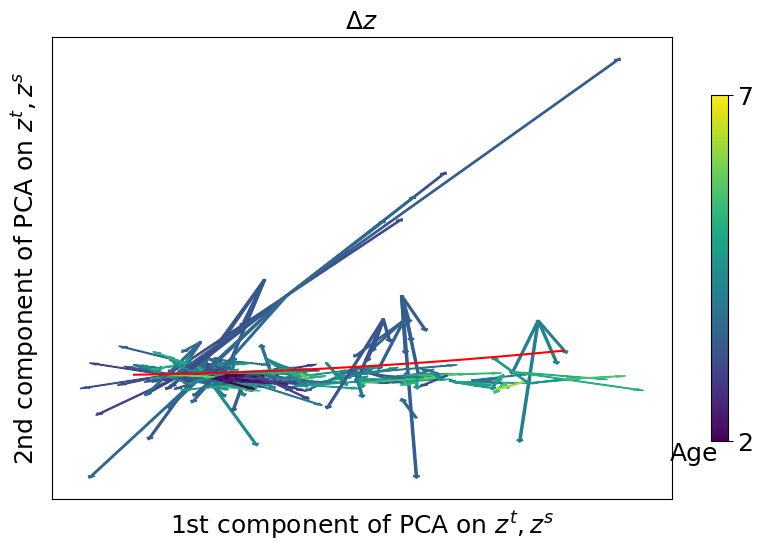

In [66]:
np.random.seed(2)
color_list = np.array(['c', 'm'])
# class_list = ['NC', 'AUD']
# age_max, age_min = 80, 30
age_max, age_min = 7, 2
age_range = age_max - age_min
print(age.shape)
# age = np.clip(age, a_min=age_min, a_max=age_max)

plt.figure(figsize=(10,6))
idx_sel_list = np.arange(z1.shape[0])
for idx in idx_sel_list:
    plt.arrow(z1[idx,0], z1[idx,1], delta_z[idx,0], delta_z[idx,1], width=0.03, color=cm.viridis((age[idx]-age_min)/age_range))
plt.plot(x_line, y_line, 'r')
# plt.xlim(-5, 15)
# plt.ylim(-4, 5.8)
plt.title('$\Delta z$', fontsize=18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis'), ticks=[0,1.0], shrink=0.75)
# cbar.ax.set_yticklabels(['21', '82'], fontsize=18)
cbar.ax.set_yticklabels(['2', '7'], fontsize=18)
cbar.set_label('Age', labelpad=-43, y=-0., rotation=0, fontsize=18)
plt.xlabel('1st component of PCA on $z^t, z^s$', fontsize=18)
plt.ylabel('2nd component of PCA on $z^t, z^s$', fontsize=18)
plt.savefig('figure_CP_train.png')

## ADNI

In [14]:
ckpt_path = '../ckpt/ADNI/'
time_label = 'LSP/2021_2_1_10_3'  # ls=1024, bs=64
data_train = h5py.File(ckpt_path+time_label+'/result_train/results_allbatch.h5', 'r')
data = h5py.File(ckpt_path+time_label+'/result_test/results_alldataset.h5', 'r')

In [17]:
img1 = data['img1']
img2 = data['img2']
recon1 = data['recon1']
label_raw = np.array(data['label']).astype(int)
z1_raw = np.array(data['z1'])
z2_raw = np.array(data['z2'])
interval_raw = np.array(data['interval'])
age_raw = np.array(data['age'])
delta_z_raw = (z2_raw - z1_raw) / np.expand_dims(interval_raw, 1)

label_raw_train = np.array(data_train['label']).astype(int)
z1_raw_train = np.array(data_train['z1'])
z2_raw_train = np.array(data_train['z2'])
interval_raw_train = np.array(data_train['interval'])
age_raw_train = np.array(data_train['age'])
delta_z_raw_train = (z2_raw_train - z1_raw_train) / np.expand_dims(interval_raw_train, 1)

In [19]:
# PCA on train set and apply on test set
num_sel = np.where(interval_raw_train>0.5)[0].shape[0]
idx_sel = np.where(interval_raw_train>0.5)[0]
feats = np.concatenate([z1_raw_train[idx_sel], z2_raw_train[idx_sel]], 0)
pca = sklearn.decomposition.PCA(n_components=2)
zs = pca.fit_transform(feats)
z1 = zs[:num_sel]
z2 = zs[num_sel:2*num_sel]
delta_z = (z2 - z1) / np.expand_dims(interval_raw_train[idx_sel], 1)
label = label_raw_train[idx_sel]
age = age_raw_train[idx_sel]

num_sel_test = z1_raw.shape[0]
feats_test = np.concatenate([z1_raw, z2_raw], 0)
zs_test = pca.transform(feats_test)
z1_test = zs_test[:num_sel_test]
z2_test = zs_test[num_sel_test:2*num_sel_test]
delta_z_test = (z2_test - z1_test) / np.expand_dims(interval_raw, 1)
label_test = label_raw
age_test = age_raw

In [20]:
# fit curve by LME
data_fit = {'y': z1[:,1], 'x': z1[:,0], 'x2': z1[:,0]**2, 'subj': idx_sel}
md = smf.mixedlm("y ~ x + x2", data_fit, groups=data_fit["subj"], re_formula="~x")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

/home/jiahong/miniconda3/envs/ml/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: y         
No. Observations:  2562    Method:             REML      
No. Groups:        2562    Scale:              0.5851    
Min. group size:   1       Log-Likelihood:     -4340.0773
Max. group size:   1       Converged:          Yes       
Mean group size:   1.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.520    0.037 -13.941 0.000 -0.593 -0.447
x             -0.021    0.002  -8.936 0.000 -0.026 -0.016
x2             0.003    0.000  17.725 0.000  0.002  0.003
Group Var      1.334                                     
Group x x Cov  0.041                                     
x Var          0.002                                     



In [25]:
# linear mixed effect model, robust version is computed in R
x_line = np.linspace(np.min(z1[:,0]), np.max(z1[:,0]))
# y_line = -0.383 - 0.017 * x_line + 0.002 * x_line**2
y_line = -0.52 - 0.021 * x_line + 0.003 * x_line**2

-26.461952209472656 43.2308464050293 -5.792330741882324 6.165668964385986


No handles with labels found to put in legend.


Text(0, 0.5, '2nd component of PCA on $z^t, z^s$')

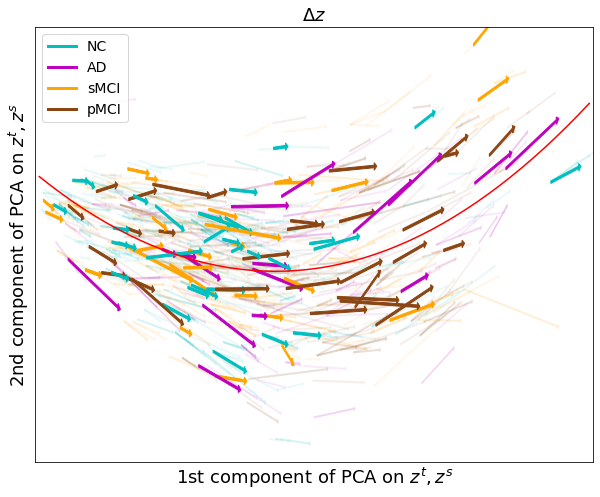

In [26]:
# training set
np.random.seed(2)
# color_list = np.array(['c', 'k', 'm', 'y', 'b'])
color_list = np.array(['c', 'k', 'm', 'orange', 'saddlebrown'])
class_list = ['NC', 'MCI', 'AD', 'sMCI', 'pMCI']
plt.figure(figsize=(10,8))
if z1.shape[0] > 100:
    idx_sel_list = np.random.choice(z1.shape[0], z1.shape[0]//2)
else:
    idx_sel_list = np.arange(z1.shape[0])
x_min = min(np.min(z1[:,0]), np.min(z1[:,0]+delta_z[:,0])) - 0.5
x_max = min(np.max(z1[:,0]), np.max(z1[:,0]+delta_z[:,0])) + 0.5
y_min = min(np.min(z1[:,1]), np.min(z1[:,1]+delta_z[:,1])) - 0.5
y_max = min(np.max(z1[:,1]), np.max(z1[:,1]+delta_z[:,1])) + 0.5
print(x_min, x_max, y_min, y_max)

for idx in idx_sel_list:
    plt.arrow(z1[idx,0], z1[idx,1], delta_z[idx,0], delta_z[idx,1], width=(x_max-x_min)*0.0005, color=color_list[label[idx]], alpha=0.05)
idx_sel_list = np.random.choice(z1.shape[0], 100)
for idx in idx_sel_list:
    plt.arrow(z1[idx,0], z1[idx,1], delta_z[idx,0], delta_z[idx,1], width=(x_max-x_min)*0.001, color=color_list[label[idx]])    
ad_idx = np.where(label==2)[0]

plt.legend()
plt.plot(x_line, y_line, 'r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('$\Delta z$', fontsize=18)
colors = ['c', 'm', 'orange', 'saddlebrown']
lines = [matplotlib.lines.Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['NC', 'AD', 'sMCI', 'pMCI']
plt.legend(lines, labels, prop={'size': 14})
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlabel('1st component of PCA on $z^t, z^s$', fontsize=18)
plt.ylabel('2nd component of PCA on $z^t, z^s$', fontsize=18)

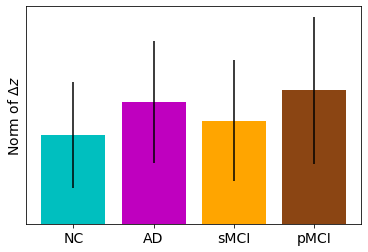

In [28]:
x = ['NC', 'AD', 'sMCI', 'pMCI']
color_list = np.array(['c', 'm', 'orange', 'saddlebrown'])
norm_delta_z = np.sqrt(np.sum(delta_z**2, 1))

mean = [np.mean(norm_delta_z[label==0]), np.mean(norm_delta_z[label==2]), np.mean(norm_delta_z[label==3]), np.mean(norm_delta_z[label==4])]
std = [np.std(norm_delta_z[label==0]), np.std(norm_delta_z[label==2]), np.std(norm_delta_z[label==3]), np.std(norm_delta_z[label==4])]
x_pos = [i for i, _ in enumerate(x)]

for i in range(4):
    plt.bar(i, mean[i], color=color_list[i], yerr=std[i])
plt.ylabel('Norm of ' + r'$\Delta z$', fontsize=14)
plt.xticks(x_pos, x, fontsize=14)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

Text(0, 0.5, '2nd component of PCA on $z^t, z^s$')

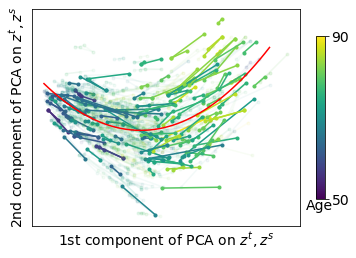

In [40]:
txtfile = pd.read_csv('../data/ADNI/fold0_train_NC_AD_pMCI_sMCI.txt', sep=' ', header=None)
idx_sel = np.where(interval_raw_train>0.5)[0]
pairs = np.array(txtfile[[3,4]].iloc[idx_sel])

np.random.seed(0)
age_max, age_min = 90, 50
age_range = age_max - age_min

for idx in range(idx_sel.shape[0]):
    if pairs[idx,1] - pairs[idx,0] > 1:
        continue
    plt.plot([z1[idx,0],z2[idx,0]], [z1[idx,1],z2[idx,1]], '.-', color=cm.viridis((age[idx]-age_min)/age_range), alpha=0.05)
    if age[idx] < 80:
        if np.random.rand() > 0.85:
            plt.plot([z1[idx,0],z2[idx,0]], [z1[idx,1],z2[idx,1]], '.-', color=cm.viridis((age[idx]-age_min)/age_range))
    if age[idx] > 80:
        if np.random.rand() > 0.6:
            plt.plot([z1[idx,0],z2[idx,0]], [z1[idx,1],z2[idx,1]], '.-', color=cm.viridis((age[idx]-age_min)/age_range))
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis'), ticks=[0,1.0], shrink=0.75)
cbar.ax.set_yticklabels(['50', '90'], fontsize=14)
cbar.set_label('Age', labelpad=-30, y=-0., rotation=0, fontsize=14)
plt.plot(x_line, y_line, 'r')
plt.xlabel('1st component of PCA on $z^t, z^s$', fontsize=14)
plt.ylabel('2nd component of PCA on $z^t, z^s$', fontsize=14)